In [1]:
import sys, os
sys.path.append(os.path.abspath("../"))

In [2]:
from art_enrich import lib as tab

In [3]:
%matplotlib inline
import betterplotlib as bpl
import numpy as np
from scipy import integrate
bpl.presentation_style()
bpl.presentation_style()

In [4]:
tab.detailed_enrichment_init()

In [5]:
def get_n_sn(age, z):
    return tab.get_ejecta_rate_sn_ii_py(age, z)[9] 

def get_energy(age, z):
    return tab.get_ejecta_rate_sn_ii_py(age, z)[10] 

In [6]:
for z in np.logspace(-7, np.log10(0.02), 20):
    print(get_n_sn(4.5E6, z))

AttributeError: cffi library 'art_enrich' has no function, constant or global variable named 'get_ejecta_rate_sn_ii_py'

In [ ]:
z_sn = [0, 0.001, 0.004, 0.02]

In [8]:
sn_low = 3E6
sn_high = 1.5E7 + 3E6

def old_sn_rate_fit(age):
    age_0 = 3E6
    rate_0 = 3.5E-9
    
    if age < sn_low:
        return 0
    if age > sn_high:
        return 0

    return rate_0 * (age_0 / age)

def old_sn_energies_fit(age):
    return 1E51 * old_sn_rate_fit(age)

ages = np.logspace(6, 8, 1000)
old_sn_rates = [old_sn_rate_fit(a) for a in ages]
old_sn_cum = integrate.cumtrapz(x=ages, y=old_sn_rates, initial=0)
old_sn_energies = [old_sn_energies_fit(a) for a in ages]
old_energies_cum = integrate.cumtrapz(x=ages, y=old_sn_energies, initial=0)

/Users/gillenb/miniconda3/envs/general/lib/python3.5/site-packages/matplotlib/mathtext.py:827: MathTextWarning: Substituting with a symbol from Computer Modern.
  MathTextWarning)
/Users/gillenb/miniconda3/envs/general/lib/python3.5/site-packages/matplotlib/figure.py:2362: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  warnings.warn("This figure includes Axes that are not compatible "


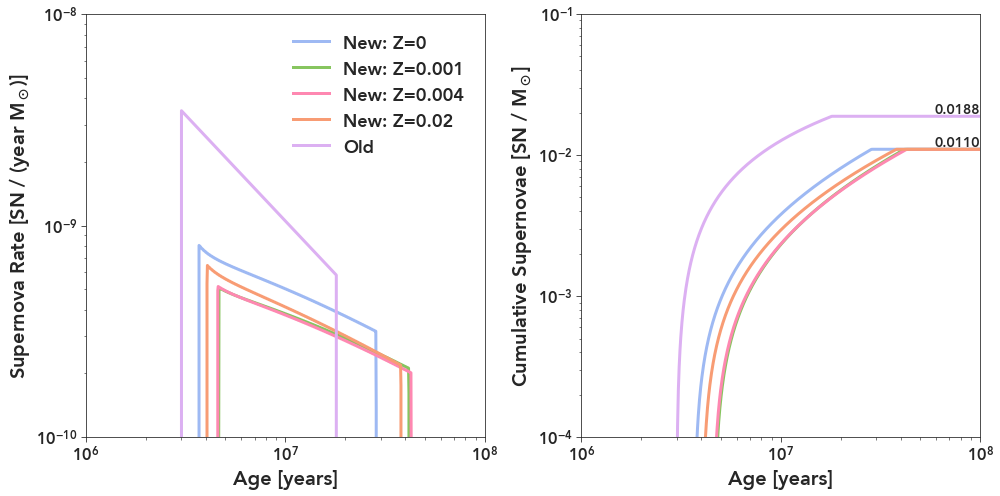

In [9]:
fig, axs = bpl.subplots(ncols=2, figsize=[14, 7])
ax0, ax1 = axs

for z in z_sn:
    rates = [get_n_sn(a, z) for a in ages]
    cumulative = integrate.cumtrapz(x=ages, y=rates, initial=0)
    
    ax0.plot(ages, rates, label="New: Z={}".format(z))
    ax1.plot(ages, cumulative)

ax0.plot(ages, old_sn_rates, label="Old")    
ax1.plot(ages, old_sn_cum)

ax0.legend(frameon=False)
for ax in axs:
    ax.set_yscale("log")
    ax.set_xscale("log")
    
ax0.add_labels("Age [years]", "Supernova Rate [SN / (year $M_\odot$)]")
ax0.set_limits(1E6, 1E8, 1E-10, 1E-8)

ax1.add_labels("Age [years]", "Cumulative Supernovae [SN / $M_\odot$]")
ax1.set_limits(1E6, 1E8, 1E-4, 0.1)

ax1.add_text(x=1E8, y=cumulative[-1], text="{:.4f}".format(cumulative[-1]),
             ha="right", va="bottom", fontsize=14)
ax1.add_text(x=1E8, y=old_sn_cum[-1], text="{:.4f}".format(old_sn_cum[-1]),
             ha="right", va="bottom", fontsize=14)

fig.savefig("plots/number_sn.png")

/Users/gillenb/miniconda3/envs/general/lib/python3.5/site-packages/matplotlib/mathtext.py:827: MathTextWarning: Substituting with a symbol from Computer Modern.
  MathTextWarning)
/Users/gillenb/miniconda3/envs/general/lib/python3.5/site-packages/matplotlib/figure.py:2362: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  warnings.warn("This figure includes Axes that are not compatible "


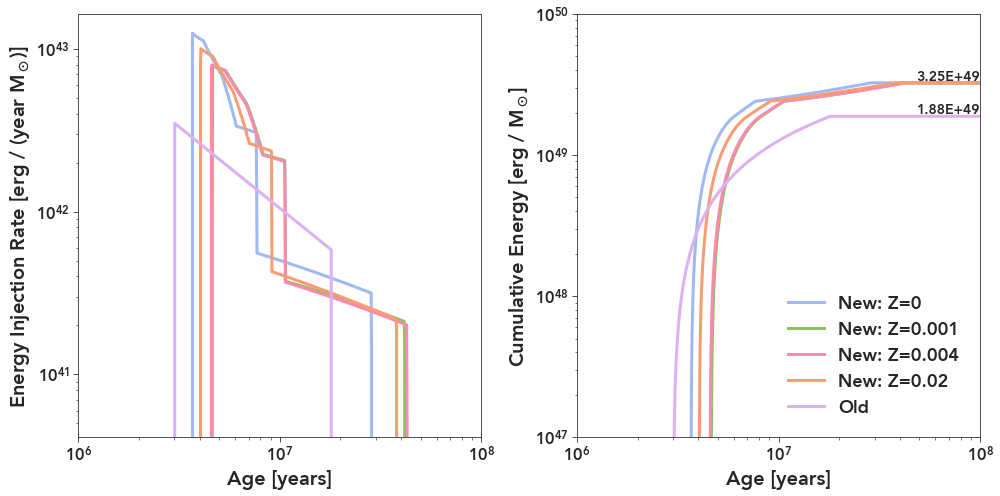

In [10]:
fig, axs = bpl.subplots(ncols=2, figsize=[14, 7])
ax0, ax1 = axs

for z in z_sn:
    energies = [get_energy(a, z) for a in ages]
    cumulative = integrate.cumtrapz(x=ages, y=energies, initial=0)
    
    ax0.plot(ages, energies)
    ax1.plot(ages, cumulative, label="New: Z={}".format(z))

ax0.plot(ages, old_sn_energies)    
ax1.plot(ages, old_energies_cum, label="Old")

ax1.legend(frameon=False)
for ax in axs:
    ax.set_yscale("log")
    ax.set_xscale("log")
    
ax0.add_labels("Age [years]", "Energy Injection Rate [erg / (year $M_\odot$)]")
ax0.set_limits(1E6, 1E8)

ax1.add_labels("Age [years]", "Cumulative Energy [erg / $M_\odot$]")
ax1.set_limits(1E6, 1E8, 1E47, 1E50)

ax1.add_text(x=1E8, y=cumulative[-1], text="{:.2E}".format(cumulative[-1]),
             ha="right", va="bottom", fontsize=14)
ax1.add_text(x=1E8, y=old_energies_cum[-1], text="{:.2E}".format(old_energies_cum[-1]),
             ha="right", va="bottom", fontsize=14)

# ax0.axvline(5.15E6)
# ax0.axvline(6.40E6)
# ax0.axvline(7.92E6)
# ax0.axvline(9.10E6)

fig.savefig("plots/energy.png")

Integrate to get total number of SN

In [11]:
for z in [0, 0.0005, 0.001, 0.0025, 0.004, 0.01, 0.02]:
    print(integrate.cumtrapz(x=ages, y=[get_energy(a, z) for a in ages])[-1])

3.2493912845319e+49
3.247023492502517e+49
3.2446557004731435e+49
3.2477408508364037e+49
3.2508260011996613e+49
3.2505945046833205e+49
3.2502086771560813e+49


In [12]:
for z in [0, 0.0005, 0.001, 0.0025, 0.004, 0.01, 0.02]:
    print(integrate.cumtrapz(x=ages, y=[get_n_sn(a, z) for a in ages])[-1])

0.010986481908414825
0.01097674543872682
0.01096700896903882
0.010968975017760094
0.010970941066481374
0.010976064639646994
0.010984603928256384


/Users/gillenb/miniconda3/envs/general/lib/python3.5/site-packages/matplotlib/mathtext.py:827: MathTextWarning: Substituting with a symbol from Computer Modern.
  MathTextWarning)
/Users/gillenb/miniconda3/envs/general/lib/python3.5/site-packages/matplotlib/figure.py:2362: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  warnings.warn("This figure includes Axes that are not compatible "


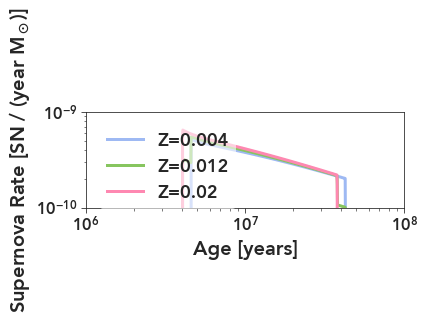

In [13]:
fig, ax = bpl.subplots()

for z in [0.004, 0.012, 0.02]:
    rates = [get_n_sn(a, z) for a in ages]
    ax.plot(ages, rates, label="Z={}".format(z))

ax.legend()

ax.set_yscale("log")
ax.set_xscale("log")
    
ax.add_labels("Age [years]", "Supernova Rate [SN / (year $M_\odot$)]")
ax.set_limits(1E6, 1E8, 1E-10, 1E-9)


fig.savefig("plots/interpolation.png")